# Starter Code

## For Q1


In [1]:
using Pkg
Pkg.add("JuMP")
Pkg.add("HiGHS")
Pkg.add("Ipopt")
Pkg.add("LinearAlgebra")

    Updating registry at `C:\Users\16084\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\16084\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\16084\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\16084\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\16084\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\16084\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\16084\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\16084\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\16084\.julia\environments\v1.8\Manifest.toml`


## Q1(a)

In [2]:
using JuMP, HiGHS, Ipopt
using LinearAlgebra

M = 20
N = 100

# generate the random polyhedron

b = rand(M)*100 
A = rand(M,N)*4 .- 2;

# model for 1-norm projection
norm1 = Model(HiGHS.Optimizer) 

# model for 2-norm projection
norm2 = Model(Ipopt.Optimizer) 

# model for infinity-norm projection
norm_inf = Model(HiGHS.Optimizer) 

# use these commands to suppress diagnostic output
set_silent(norm1)
set_silent(norm2)
set_silent(norm_inf)

# do "iteration" tests of random points to see what fraction are in the polyhedron

count_in=0
iteration = 1000

# Here insert "iteration" random trials for points and check to see whether they are in P. 
# Increment count_in if they are. 
# save a point x_hat that is NOT in P
# Calculate prob_in_P.

x_hat = rand(N)*2 .- 1
while iteration > 0
    x = rand(N)*2 .- 1
    if all(*(A, x) <= b)
        count_in += 1
    else
    x_hat = x
    end
    iteration -= 1
end
prob_in_P = count_in/1000
print("probability of point in polyhedron = ", prob_in_P)

probability of point in polyhedron = 0.986

## Q1(b)

In [3]:
# here define constraints for the three projection models 

# define z_norm2 to be the SQUARE of the 2-norm distance to P
# define z_norm1 to be the 1-norm distance to P
# define z_norm_inf to be the inf-norm distance to P
norm2 = Model(Ipopt.Optimizer)

@variable(norm2, x[1:100])

@constraint(norm2, A * x[1:100] .<= b)

# solve the three models and print results.
print("\n************** norm2 **************\n")
@objective(norm2, Min, sum((x.- x_hat).^2));
optimize!(norm2);
print("2-norm distance to P is ", sqrt(objective_value(norm2)))


************** norm2 **************

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:     2000
Number of nonzeros in Lagrangian Hessian.............:      100

Total number of variables............................:      100
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:  

In [4]:
norm1 = Model(HiGHS.Optimizer) 

@variable(norm1, t[1:100])
@variable(norm1, x[1:100])

@constraint(norm1, A * x[1:100] .<= b)
for i = 1:100
    @constraint(norm1, -t[i] <= x[i] - x_hat[i])
    @constraint(norm1, x[i] - x_hat[i] <= t[i])
end
print("\n************** norm1 **************\n")
@objective(norm1, Min, sum(t))
optimize!(norm1);
print("1-norm distance to P is ", objective_value(norm1))
# model for 1-norm projection


************** norm1 **************
Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
220 rows, 200 cols, 2400 nonzeros
220 rows, 200 cols, 2400 nonzeros
Presolve : Reductions: rows 220(-0); columns 200(-0); elements 2400(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -4.4400000000e+05 Ph1: 132(939807); Du: 100(444) 0s
        265     2.9247679083e+00 Pr: 0(0) 0s
Model   status      : Optimal
Simplex   iterations: 265
Objective value     :  2.9247679083e+00
HiGHS run time      :          0.02
1-norm distance to P is 2.924767908274003

In [5]:
norm_inf = Model(HiGHS.Optimizer) 

@variable(norm_inf, y)
@variable(norm_inf, x[1:100])

@constraint(norm_inf, A * x[1:100] .<= b)
for i = 1:100
    @constraint(norm_inf, x[i] - x_hat[i] <= y)
    @constraint(norm_inf, -y <= x[i] - x_hat[i])
end
print("\n************** norm inf **************\n")
@objective(norm_inf, Min, y)
optimize!(norm_inf);
print("inf-norm distance to P is ", objective_value(norm_inf))
print("\n**********************************\n")


************** norm inf **************
Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
220 rows, 101 cols, 2400 nonzeros
220 rows, 101 cols, 2400 nonzeros
Presolve : Reductions: rows 220(-0); columns 101(-0); elements 2400(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -4.0000000000e+03 Ph1: 172(957801); Du: 1(4) 0s
        371     6.5941418166e-02 Pr: 0(0) 0s
Model   status      : Optimal
Simplex   iterations: 371
Objective value     :  6.5941418166e-02
HiGHS run time      :          0.01
inf-norm distance to P is 0.06594141816600316
**********************************


## For Q2
### Eigenvectors and eigenvalues

## Q2(a)

In [6]:
using LinearAlgebra

A = [2 2 -3; 2 6 -3; -3 -3 2]

# use eigvals() to get the eigenvalues of a matrix
eigvals(A)

3-element Vector{Float64}:
 -1.0990195135927852
  1.9999999999999998
  9.099019513592784

## Q2(b)

In [7]:
# we can also use eigen() to obtain its eigenvalues and eigenvectors
# here L is the array of eigen values, U is the matrix of eigenvectors
(L, U) = eigen(A) 

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
3-element Vector{Float64}:
 -1.0990195135927703
  2.0000000000000036
  9.099019513592784
vectors:
3×3 Matrix{Float64}:
 -0.641359  -0.639602  -0.423754
 -0.138236   0.639602  -0.756175
 -0.754685   0.426401   0.49863

In [8]:
a = U * diagm(L) * U'
println(A == a)

false


The constraint (1) is not an ellipsoid because it contain the negative number.

## Q2(c)

In [9]:
v = randn(3, 1)
x = 2.0000000000000036
y = 9.099019513592784
A = diagm([sqrt.(x), sqrt.(y)])*U[:,[2, 3]]'
B = sqrt.(2)*U[:, 1]'
print("||Av||^2 - ||Bv||^2 = ", norm(A*v)^2 - norm(B*v)^2)

||Av||^2 - ||Bv||^2 = 3.2069285433325563

## Q2(d)

In [10]:
x, y, z = U[:,1]
print("2x^2 + 6y^2 + 2z^2 + 4x*y - 6x*z - 6y*z <= ", 2x^2 + 6y^2 + 2z^2 + 4x*y - 6x*z - 6y*z)

2x^2 + 6y^2 + 2z^2 + 4x*y - 6x*z - 6y*z <= -1.0990195135927847

The vector (x, y, z) that satisfies the constraint (1) because the answer of that formula is really less or equal than 1.

In [11]:
print("x^2 + y^2 + z^2 = ", x^2 + y^2 + z^2)

x^2 + y^2 + z^2 = 1.0

The vector (x,y,z) that has arbitrarily large magnitude because x^2 + y^2 + z^2 is really as large as you like, which is 1, the largest number that satisfies the condition.

## For Q3

### 1. Plotting

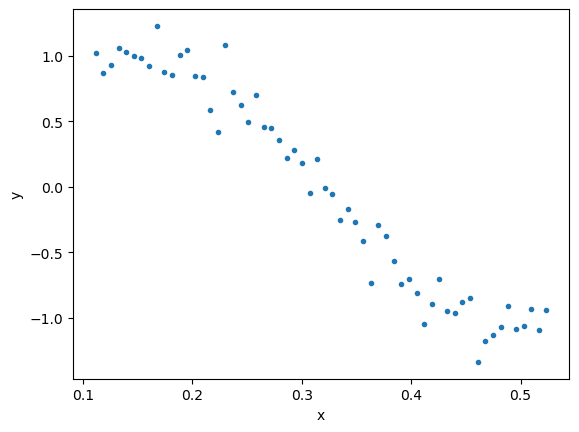

In [12]:
using PyPlot, CSV, DataFrames

data = CSV.read("lasso_data.csv", DataFrame)
x = data[:,1]
y = data[:,2]
plot(x, y, ".");
xlabel("x"); ylabel("y");
n=size(data, 1);

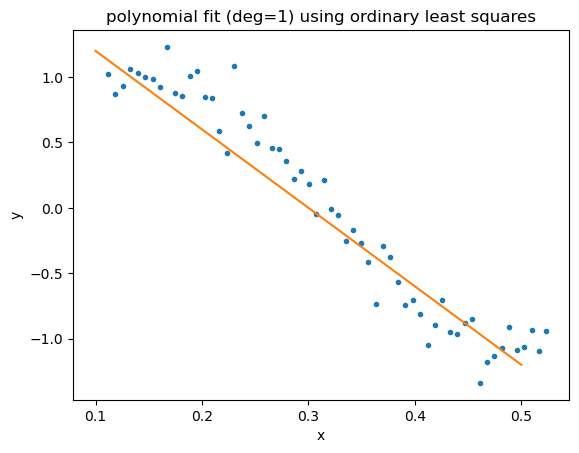

In [13]:
# plot a line on top of it

f(x) = -6 * x + 1.8;

# points of the line
xs = range(0.1, 0.5, length=100);
ys = f.(xs);


# plot the scatters again
plot(x, y, ".");
# plot the line
plot(xs,ys,"-");
title(string("polynomial fit (deg=", 1, ") using ordinary least squares")); # it is not!
xlabel("x"); ylabel("y");

## Q3(a)

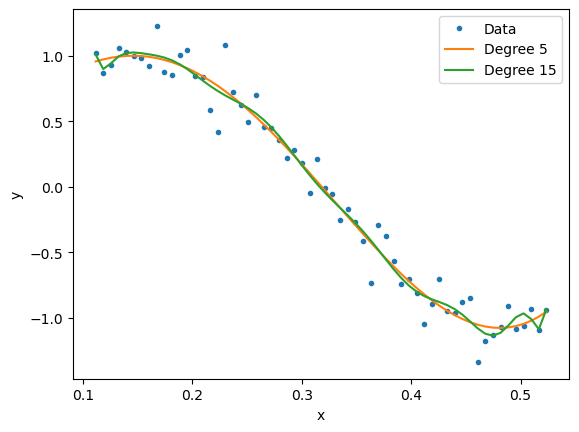

PyObject <matplotlib.legend.Legend object at 0x0000022614B8A320>

In [14]:
data = CSV.read("lasso_data.csv", DataFrame)
x = data[:,1]
y = data[:,2]
plot(x, y, ".", label="Data")
xlabel("x"); ylabel("y");

# Create the design matrix for polynomial regression
function design_matrix(x, degree)
    X = ones(length(x), degree+1)
    for i = 1:degree
        X[:,i+1] = x.^i
    end
    return X
end

# Fit a polynomial of degree 5
degree_5 = 5
X_5 = design_matrix(x, degree_5)
β_5 = X_5 \ y
y_5 = X_5 * β_5
plot(x, y_5, "-", label="Degree 5")

# Fit a polynomial of degree 15
degree_15 = 15
X_15 = design_matrix(x, degree_15)
β_15 = X_15 \ y
y_15 = X_15 * β_15
plot(x, y_15, "-", label="Degree 15")
legend(loc="best")

## Q3(b)

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 38.919304, 16, 0.004001, 0.000000, 0, 0.000000, 0.000000
123, 1.022678, 16, 0.008002, 0.000000, 0, 0.000000, 1.000000
Model   status      : Optimal
QP ASM    iterations: 123
Objective value     :  1.0223298232e+00
HiGHS run time      :          0.01


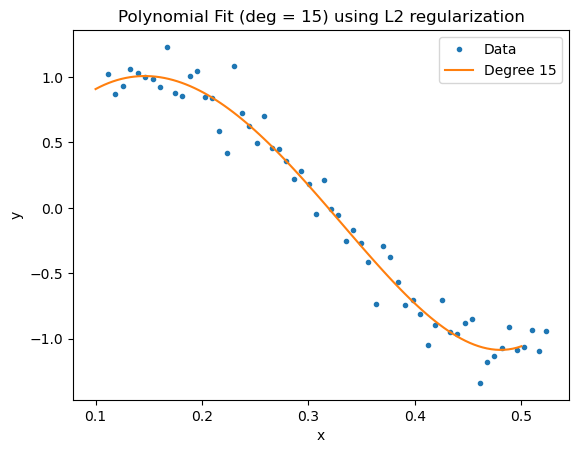

PyObject <matplotlib.legend.Legend object at 0x0000022614B64160>

In [15]:
lambda = 10^(-6)

A = [x[i]^(16-j) for i in 1:length(x), j in 1:16]

m = Model(HiGHS.Optimizer)

@variable(m, 0 <= slack[1:n])
@variable(m, coeff[1:16])

@constraint(m, y - A*coeff .>= -slack)
@constraint(m, y - A*coeff .<= slack)

@objective(m, Min, lambda * sum(coeff.^2) + sum(slack.^2))

optimize!(m)

ffine = ones(100)
x_matrix = range(0.1, stop= 0.5, length = 100)
for i = 1:15
    ffine = [ffine .* x_matrix ones(100)]
end

y_matrix = ffine * value.(coeff)

figure()
plot(x, y, ".", label = "Data")
plot(x_matrix, y_matrix, label = "Degree 15")
xlabel("x")
ylabel("y")
title("Polynomial Fit (deg = 15) using L2 regularization")
legend(loc="best")

## Q3(c)

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:     2104
Number of nonzeros in Lagrangian Hessian.............:       60

Total number of variables............................:       92
                     variables with only lower bounds:       60
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:      152
        inequality constraints with only lower bounds:       60
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       92

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  5.9999880e-03 1.33e+00 9.93e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

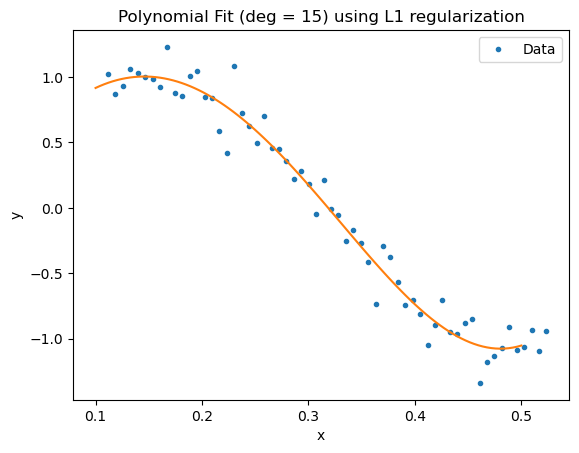

PyObject <matplotlib.legend.Legend object at 0x00000226212EC2B0>

In [17]:
using Ipopt

lambda = 10^(-6)

A = [x[i]^(16-j) for i in 1:length(x), j in 1:16]

m = Model(Ipopt.Optimizer)
@variable(m, u[1:16])
@variable(m, 0 <= t[1:n])
@variable(m, r[1:16])

@constraint(m, y - A*u .<= t)
@constraint(m, y - A*u .>= -t)
@constraint(m, u .<= r)
@constraint(m, -u .<= r)

@objective(m, Min, sum(t.^2) + lambda * sum(r) )
optimize!(m)


x_matrix = range(0.1,stop= 0.5, length = 100)
ffine = ones(100)
for j = 1:15
    ffine = [ffine.*x_matrix ones(100)]
end
y_matrix = ffine * value.(u)

figure()
plot(x, y, ".", label = "Data")
plot(x_matrix, y_matrix)
xlabel("x")
ylabel("y")
title("Polynomial Fit (deg = 15) using L1 regularization")
legend()